In [5]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


In [51]:
def deriv(y, t, N, bt, gamma, rho, qo, po):
    S, E, Io, Ir, R = y
    dSdt = -bt * S * Ir / N - bt*S*qo*Io/N
    dEdt = bt * S * Ir / N + bt*S*qo*Io/N - rho*E
    dIodt = rho*E*po - gamma*Io
    dIrdt = (1-po)*rho*E - gamma*Ir
    dRdt = gamma*(Io+Ir)
    return dSdt, dEdt, dIodt, dIrdt, dRdt

In [52]:
# describe the parameters
N =  2374550           # population
bt = 2.5        
gamma= 1/5
rho = 1/5.1
qo = 0.55
po = 0.987
S0, E0, Io0, Ir0, R0 = N-1, 1, 0, 0, 0 # initial conditions: one infected, rest susceptible

In [53]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, Io0, Ir0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, bt, gamma, rho, qo, po))
S, E, Io, Ir, R = ret.T

In [54]:
def plotsir(t, S, E, Io, Ir, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, Io, 'r', alpha=0.7, linewidth=2, label='Infected(unreported)')
  ax.plot(t, Ir, 'c', alpha=0.7, linewidth=2, label='Infected(reported)')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig("plot.png")
  plt.show();

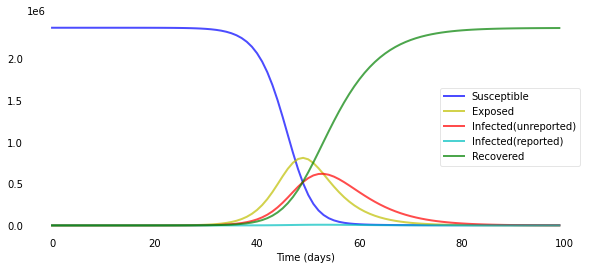

In [55]:

plotsir(t, S, E, Io, Ir, R)


In [38]:
print(Ir)


[0.00000000e+00 2.18732051e-03 4.08880682e-03 6.17133107e-03
 8.78462665e-03 1.22682741e-02 1.70217040e-02 2.35630575e-02
 3.25921071e-02 4.50682644e-02 6.23140562e-02 8.61560579e-02
 1.19118699e-01 1.64691703e-01 2.27699559e-01 3.14812185e-01
 4.35250782e-01 6.01763508e-01 8.31974014e-01 1.15024513e+00
 1.59025411e+00 2.19855028e+00 3.03946846e+00 4.20191192e+00
 5.80871066e+00 8.02952278e+00 1.10986000e+01 1.53392137e+01
 2.11971659e+01 2.92866265e+01 4.04525661e+01 5.58552917e+01
 7.70839525e+01 1.06307127e+02 1.46469150e+02 2.01539520e+02
 2.76817336e+02 3.79279301e+02 5.17932338e+02 7.04081772e+02
 9.51345237e+02 1.27513132e+03 1.69118813e+03 2.21279545e+03
 2.84638794e+03 3.58604696e+03 4.40839833e+03 5.27051117e+03
 6.11334686e+03 6.87131026e+03 7.48518751e+03 7.91356638e+03
 8.13862178e+03 8.16525924e+03 8.01556420e+03 7.72158015e+03
 7.31879111e+03 6.84142610e+03 6.31969838e+03 5.77858827e+03
 5.23765848e+03 4.71146247e+03 4.21023268e+03 3.74065178e+03
 3.30659614e+03 2.909797